**TITLE OF PROJECT**: Identification of network attacks on IoT devices

Submitted by: Akash V Nair

Organisaton: Entri Elevate

**Table of Contents**:


1. [Introduction](#intro)
2. [Project Goal](#goal)
3. [Data Collection](#datacollect)
4. [Data Story](#story)
5. [Data Loading](#dataloading)
6. [Dataset Analysis](#dataanalysis)
7. [Data Cleaning](#cleaning)
8. [Feature Selection](#featselect)
9. [Outlier Handling](#outhand)
10. [Data Encoding](#encoding)
11. [Data Sampling](#datsam)
12. [Feature Engineering](#feateng)
13. [Model Building](#modbuild)
14. [Pipelining the model](#pipe)
15. [Saving the model](#save)

Visualisations:
1. [Class distribution in object classes](#objdist)
2. Boxplots:
  a. [Numerical columns](#outnum)
  b. [IQR normalised data](#iqr)
  c. [log transformed IQR normalised data](#logiqr)
3. [Feature column distribution of standard deviation](#stdev)
4. [Feature column distribution of range](#range)
5. [Histogram of Target column classes](#clas)
6. [Histogram of Target class after sampling adjustments](#sampclas)
7. [Scatterplots of collinear features](#colli)
8. [Heatmap of feature correlation](#heatcorr)
9. [Plot of cumulative explained variance ratio](#pca)
10. [Heatmap of features  after dimensionality reduction](#dimcorr)
11. [Plot of effect of hyperparameter tuning](#mod)
12. [Plot of confusion matrix of pipeline prediction](#hm)


<a name="intro"></a>**Introduction**:
The Internet of Things (IoT) refers to a network of physical devices, vehicles, appliances, and other physical objects that are embedded with sensors, software, and network connectivity, allowing them to collect and share data. IoT devices—also known as “smart objects”—can range from simple “smart home” devices like smart thermostats, to wearables like smartwatches and RFID-enabled clothing, to complex industrial machinery and transportation systems.[1](https://www.ibm.com/topics/internet-of-things)

Forrester Research concluded in its "The State of IoT Security, 2023" report that IoT devices were the most reported target for external attacks; they were attacked more than either mobile devices or computers. Hackers scan networks for devices and known vulnerabilities and increasingly use nonstandard ports to get network access. Once they have device access, it's easier to avoid detection through fileless malware or software memory on the device.[2](https://www.techtarget.com/iotagenda/tip/5-IoT-security-threats-to-prioritize)

Owing to the increasing presence of IoT devices and the risk of compromising personal data to hackers, it is necessary to enforce robust mechanisms which defends against these attacks.By incorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns the nature of network traffic is analysed using the Zeek network monitoring tool and the Flowmeter plugin.Using these data, a model building is attempted to effectively classify the nature of network interaction going on which leads to the classification of type of attack faced by the IoT devices.


<a name="goal"></a>**Project Goal**:
The project aims to analyse the changes in the network parameters caused due to attacks on IoT devices. This helps to neutralize threats efficiently by aiding the Intrusion Detection Systems in effectively identifying the type of threat.

A model building is attempted which takes network parameters as features to make a classification of the type of attack from among some known attack types.

<a name="datacollect"></a>**Data Collection:**
The data is collected from a secondary source that is UCIrvine Machine Learning Repository. The [dataset](https://archive.ics.uci.edu/dataset/942/rt-iot2022) was donated to the repository and it appeared in an introductory [paper](semanticscholar.org/paper/Quantized-autoencoder-(QAE)-intrusion-detection-for-Sharmila-Nagapadma/753f6ede01b4acaa325e302c38f1e0c1ade74f5b) published in Cybersecurity. The citation for the same is given below.

S., B. & Nagapadma, R. (2023). RT-IoT2022  [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5P338

<a name="story"></a>**Data Story:**
The dataset encompasses both normal and adversarial network behaviors, providing a general representation of real-world scenarios.Incorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin.Infrastructure consists of two parts, namely IoT victim devices and IoT attacker devices, both connected through a router. We collect the network traffic through a router using Wireshark, which is an open-source monitoring tool for network traffic that helps extract traces and convert them into a PCAP file.The attacking infrastructure includes 50 machines, and the victim organization has 5 departments and includes 420 machines and 30 servers. The dataset includes the captures network traffic and system logs of each machine, along with 80 features extracted from the captured traffic.It includes 9 different attack scenarios: DOS_SYN_Hping,, ARP_poisioning, NMAP_UDP_SCAN,
NMAP_XMAS_TREE_SCAN, NMAP_OS_DETECTION, NMAP_TCP_scan, DDOS_Slowloris, Metasploit_Brute_Force_SSH, NMAP_FIN_SCAN and 3 normal pattern MQTT, Thing_speak and Wipro_bulb_Dataset.[3](https://www.kaggle.com/datasets/supplejade/rt-iot2022real-time-internet-of-things)

<a name="dataloading"></a>**DATA LOADING**

In [1]:
#importing necessary libraries and classes.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle

In [2]:
data=pd.read_csv("RT_IOT2022") #dataset is stored in data variable
data.head()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


The dataset consist of 85 columns. The column 'Unnamed: 0' is the repetition of the index so it can be removed. 3 columns from the visible portion seem to be of object type and the remaining columns seem to be in numerical form.

<a name="dataanalysis"></a>**DATASET ANALYSIS**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

Further dataset details are available. Number of rows=123117, Number of columns=85. Number of object columns are confirmed to be 3. Null values are not detected in any of the columns.

In [4]:
data['proto'].value_counts()

proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64

First object column ie 'proto' is heavily biased and consist of 3 distinct classes.

In [5]:
data['service'].value_counts()

service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64

Second object column ie 'service' consist of 10 distinct classes. The data is heavily biased to a service denoted by '-' which might be a denotion of missing data or a specific type of service.

In [6]:
data['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

The third object column ie 'Attack_type' is the target column and it is also biased to a value 'DOS_SYN_Hping'. There are 12 distinct classes of which classes MQTT_Publish, Thing_Speak, Wipro_bulb are normal pattern and the remaining classes are attack patterns.<a name="objdist"></a>

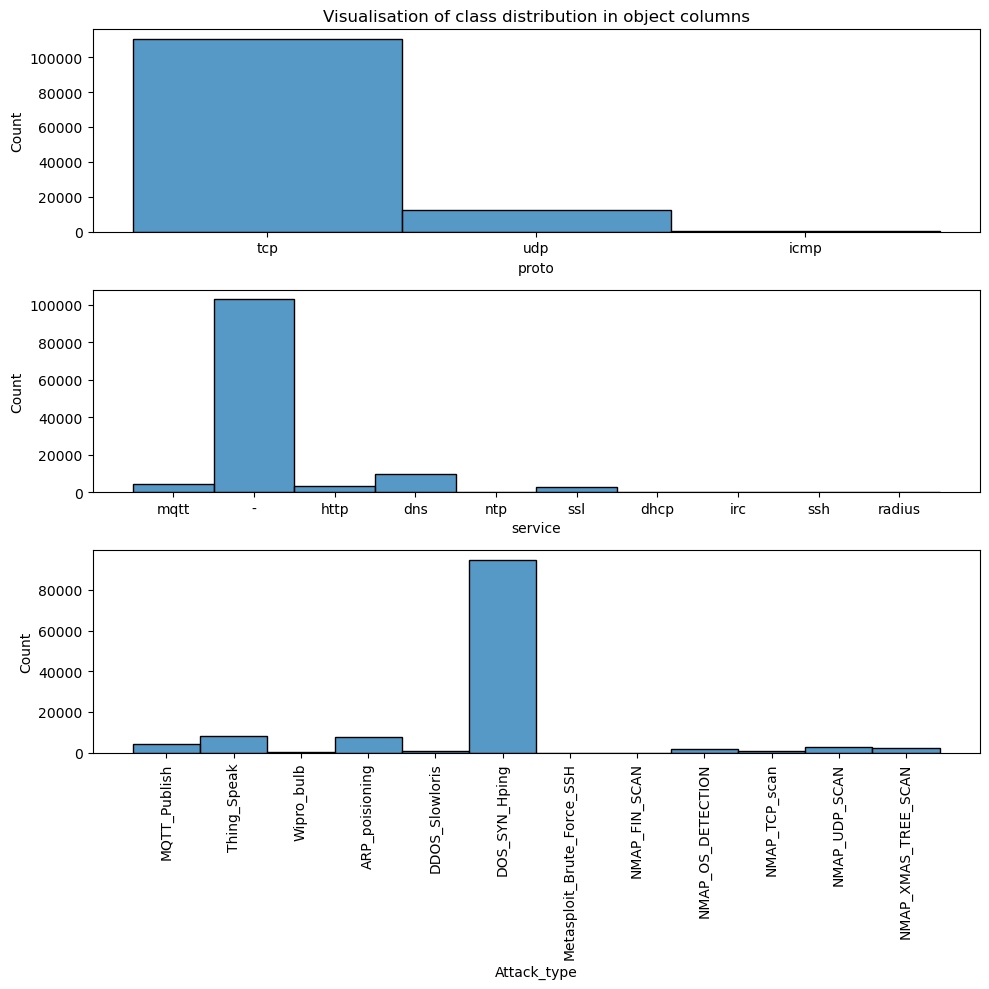

In [7]:
fig,ax=plt.subplots(3,1)
k=0
ax[0].set_title("Visualisation of class distribution in object columns")
for i in ['proto','service','Attack_type']:
  sns.histplot(data[i],ax=ax[k])
  k+=1
fig.set_figheight(10)
fig.set_figwidth(10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The classes are heavily biased in all object columns

<a name="cleaning"></a>**DATA CLEANING**

In [8]:
data.drop(columns='Unnamed: 0',inplace=True)

In [9]:
data.duplicated().sum()

5195

In [10]:
new_data=data.drop_duplicates() #a new variable is created to hold the cleaned data
new_data

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,59247,63331,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123113,59247,64623,tcp,-,0.000007,1,1,0,0,144631.172414,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123114,59247,64680,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123115,59247,65000,tcp,-,0.000006,1,1,0,0,167772.160000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


By removing the duplicates from the dataset, the total number of rows came down to 117922 from initial value of 123117.

In [11]:
new_data.isnull().sum().sort_values()

id.orig_p                   0
fwd_subflow_pkts            0
payload_bytes_per_second    0
flow_iat.std                0
flow_iat.avg                0
                           ..
flow_ACK_flag_count         0
bwd_PSH_flag_count          0
fwd_PSH_flag_count          0
fwd_pkts_payload.max        0
Attack_type                 0
Length: 84, dtype: int64

Null values are confirmed to be absent in the dataset

<a name="featselect"></a>**FEATURE SELECTION**

In [12]:
new_data=new_data.drop(columns=['id.orig_p','id.resp_p'])
new_data

,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,tcp,mqtt,32.011598,9,5,3,3,0.281148,0.156193,0.437341,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,tcp,mqtt,31.883584,9,5,3,3,0.282277,0.156821,0.439097,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,tcp,mqtt,32.124053,9,5,3,3,0.280164,0.155647,0.435811,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,tcp,mqtt,31.961063,9,5,3,3,0.281593,0.156440,0.438033,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,tcp,mqtt,31.902362,9,5,3,3,0.282111,0.156728,0.438839,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,tcp,-,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123113,tcp,-,0.000007,1,1,0,0,144631.172414,144631.172414,289262.344828,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123114,tcp,-,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
123115,tcp,-,0.000006,1,1,0,0,167772.160000,167772.160000,335544.320000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN


The columns id.orig_p, id.resp_p are duplicate of index and id numbers and hence their presence holds no relevance in model building. Total number of columns reduced by 2 to 82.

<a name="outhand"></a> **OUTLIER HANDLING**

In [13]:
num=new_data.select_dtypes(include='number') #variable num holds numeric features
cat=new_data.select_dtypes(include='object').drop(columns='Attack_type') #variable num holds object features excluding target column

The numerical columns and categorical columns extracted from the dataset and stored seperately for further processing. The target column is dropped as it is not required for processing.

In [14]:
def outview(da):
  tmp=da.copy()
  fig,ax=plt.subplots(nrows=7,ncols=5)
  k=0
  fig.set_figheight(10)
  fig.set_figwidth(10)
  for i in range(7):
    for j in range(5):
      sns.boxplot(tmp[tmp.columns.tolist()[k]],ax=ax[i,j])#generates first 35 box plots
      k+=1
  plt.tight_layout()
  fig,ax=plt.subplots(nrows=7,ncols=5)
  fig.set_figheight(10)
  fig.set_figwidth(10)
  for i in range(7):
    for j in range(5):
      sns.boxplot(tmp[tmp.columns.tolist()[k]],ax=ax[i,j])#generates next 35 boxplots
      k+=1
  plt.tight_layout()
  fig,ax=plt.subplots(nrows=2,ncols=5)
  fig.set_figheight(3)
  fig.set_figwidth(10)
  for i in range(2):
    for j in range(5):
      if(k>78):
        break
      sns.boxplot(tmp[tmp.columns.tolist()[k]],ax=ax[i,j])#generates remaining 9 boxplots
      k+=1
  plt.tight_layout()

This is a function to display the boxplots of the features present in the DataFrame passed onto it. The features are plotted as subplots and is plotted as 3 groups to prevent the plots from being too small in dimension.<a name="outnum"></a>

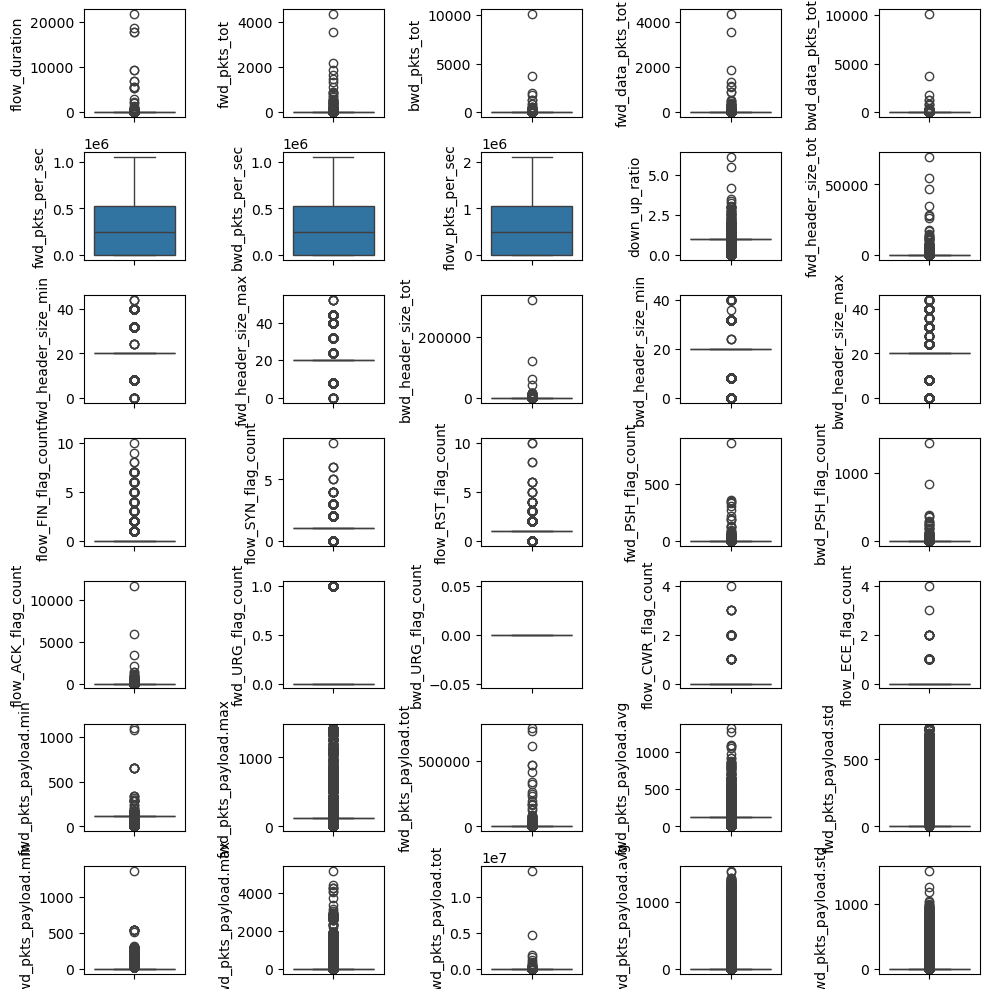

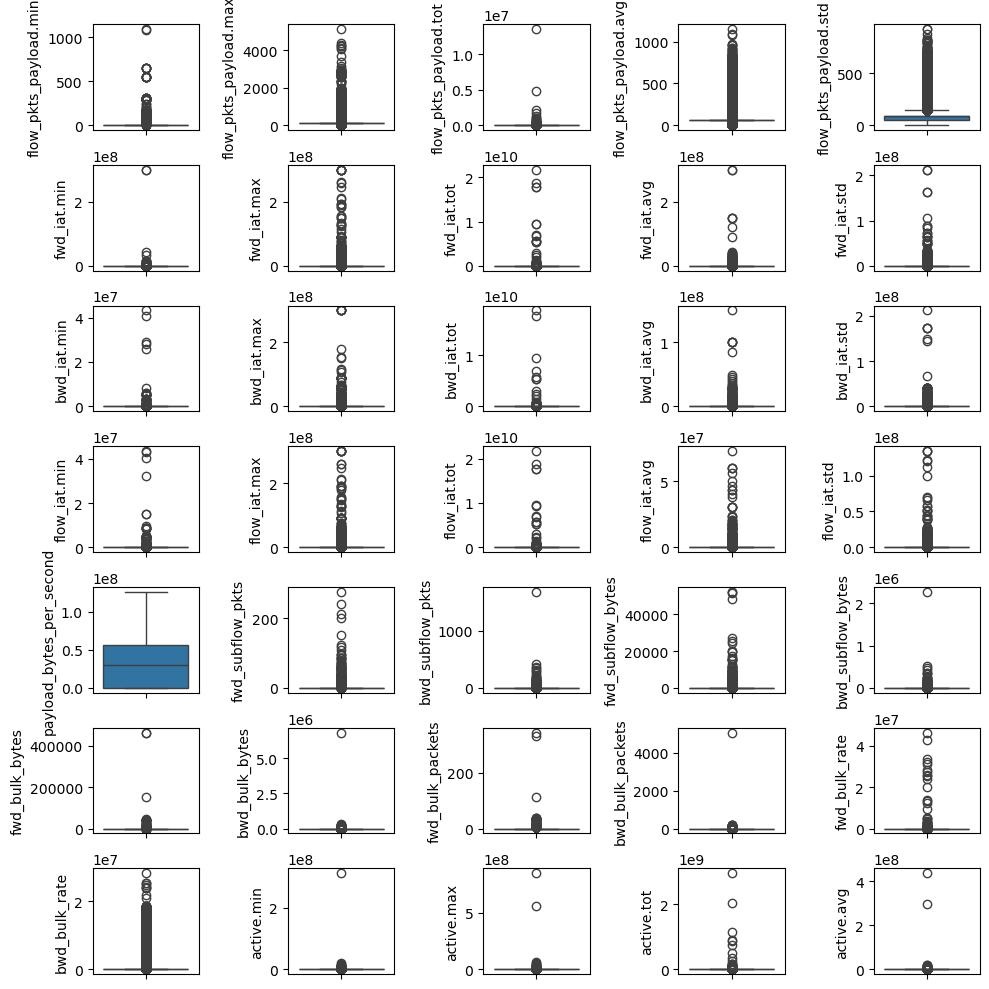

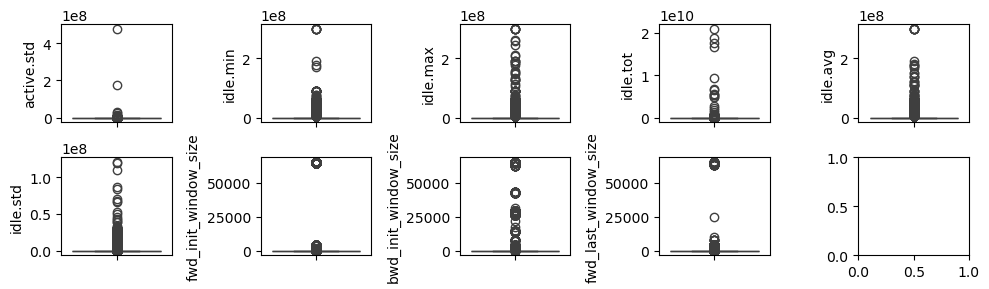

In [15]:
outview(num)#to generate boxplots of the dataset containing numerical values(num)

Boxplots of individual features shows presence of outliers in all but 5 features.

In [16]:
num.describe()#to display the statistical features of all columns in num DataFrame

,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,117922.000000,117922.000000,117922.000000,117922.000000,117922.000000,1.179220e+05,1.179220e+05,1.179220e+05,117922.000000,117922.000000,...,1.179220e+05,1.179220e+05,1.179220e+05,1.179220e+05,1.179220e+05,1.179220e+05,1.179220e+05,117922.000000,117922.000000,117922.000000
mean,3.808474,2.290209,1.942776,1.470506,0.847594,3.510607e+05,3.510144e+05,7.020751e+05,0.855131,54.786961,...,1.526317e+05,2.396955e+04,1.686908e+06,1.775118e+06,3.534021e+06,1.736783e+06,4.721069e+04,6248.730101,2816.081393,740.173165
std,127.064242,22.111453,33.727670,19.286029,32.989078,3.707032e+05,3.707417e+05,7.414422e+05,0.336849,398.185025,...,1.646622e+06,1.508853e+06,8.994502e+06,9.444945e+06,1.212397e+08,9.194955e+06,1.114041e+06,18893.603277,10167.532706,6242.323840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000001,1.000000,1.000000,1.000000,0.000000,7.347488e+01,7.157500e+01,1.469916e+02,1.000000,20.000000,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,4.934475e+05,1.000000,20.000000,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,1.048576e+06,1.000000,20.000000,...,5.006790e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,21728.335578,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,2.097152e+06,6.087899,69296.000000,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


Description of numerical features also show presence of outliers in many columns<a name="stdev"></a>

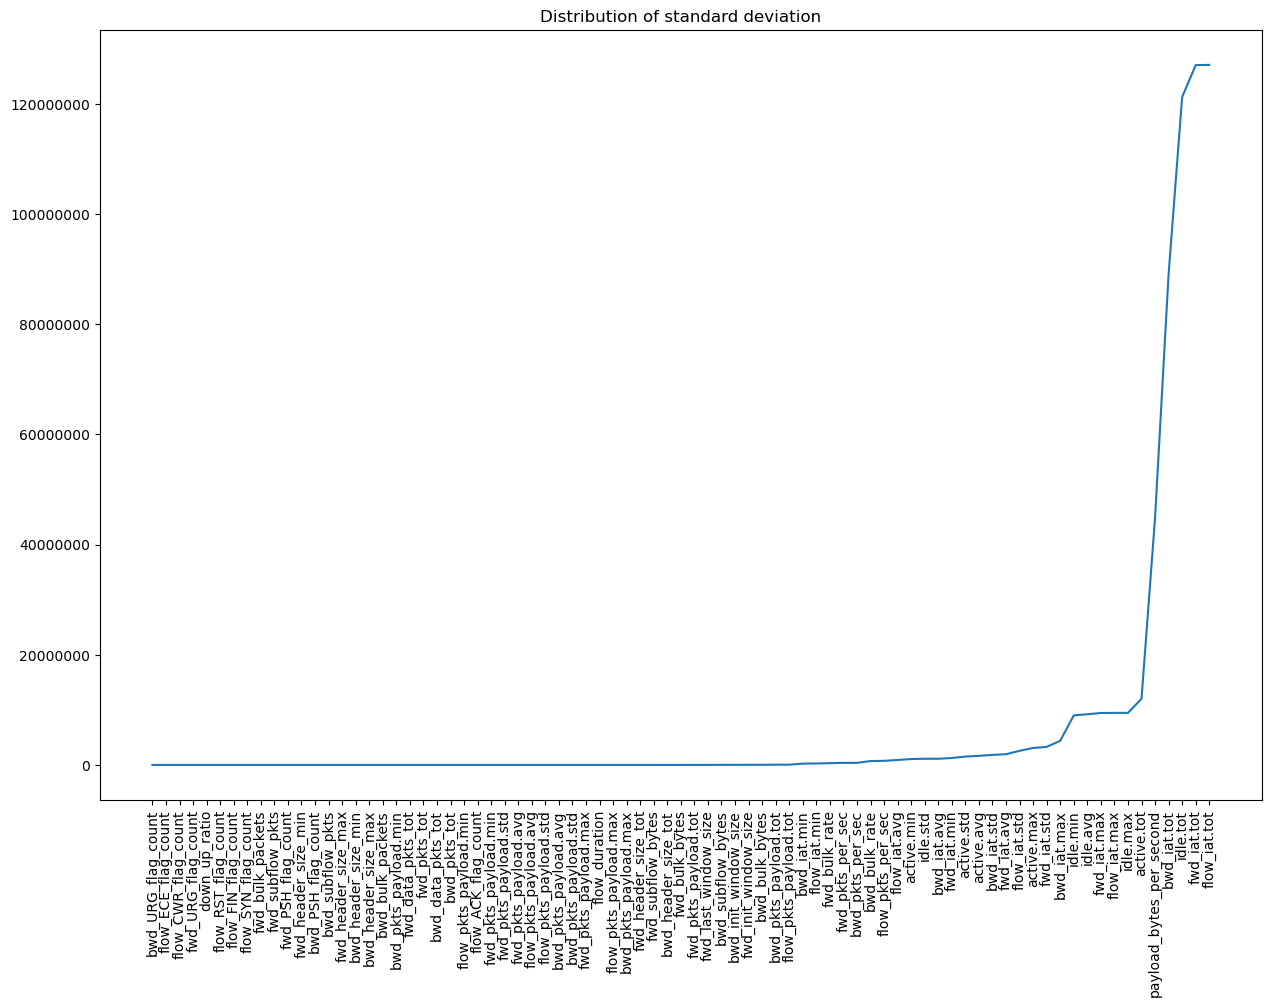

In [17]:
plt.figure(figsize=(15,10))
plt.plot(num.std().sort_values())
plt.xticks(rotation=90)
plt.ticklabel_format(axis='y',style='plain')
plt.title("Distribution of standard deviation")
plt.show()

3 or 4 columns are showing very high standard deviation which indicates highly dispersed data. This is also an indication of high outlier presence.<a name="range"></a>

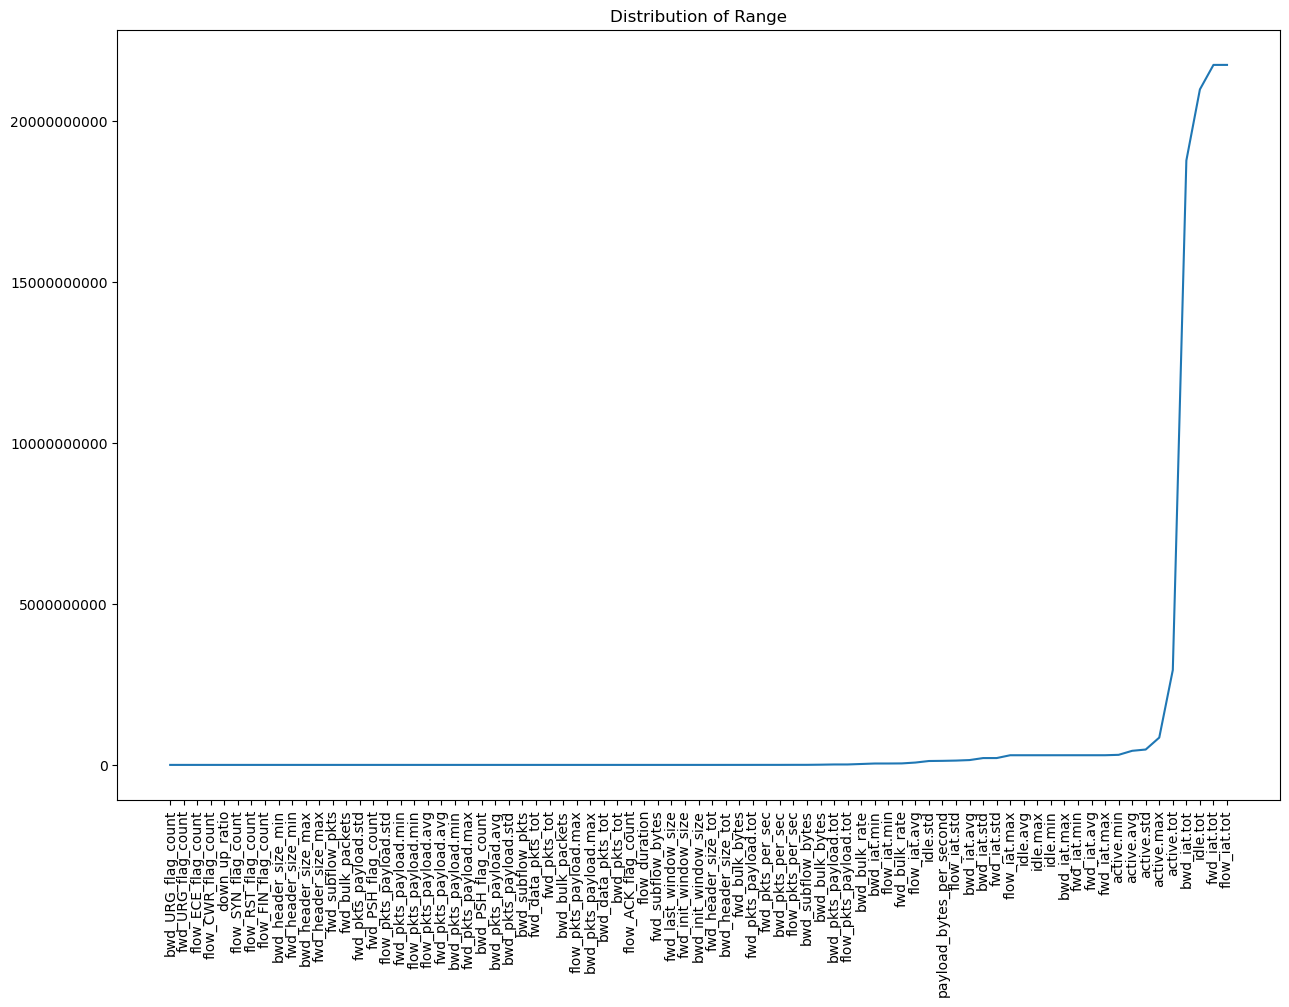

In [18]:
plt.figure(figsize=(15,10))
plt.plot((num.max()-num.min()).sort_values())
plt.xticks(rotation=90)
plt.ticklabel_format(axis='y',style='plain')
plt.title("Distribution of Range")
plt.show()

Range of some of the columns are absurdly high. The remaining columns are following a fairly linear when compared with std dev graph.

In [19]:
def iqrnorm(num1):
  tmp=num1.copy()
  tem=num1.copy()
  for i in tmp.columns:
    t=3
    while(t>=0):
      if (tmp[i].skew()>1 and tmp[i].skew()<=tem[i].skew()):
        tmp[i]=num1[i]
        iqr=tmp[i].quantile(.75)-tmp[i].quantile(.25)
        tmp.loc[tmp[i]>(tmp[i].quantile(.75)+t*iqr),i]=tmp[i].median()
        tmp.loc[tmp[i]<(tmp[i].quantile(.25)-3*iqr),i]=tmp[i].median()
        if(tmp[i].skew()<=tem[i].skew()):
          tem[i]=tmp[i]

      elif (tmp[i].skew()<-1 and tmp[i].skew()>=tem[i].skew()):
        tmp[i]=num1[i]
        iqr=tmp[i].quantile(.75)-tmp[i].quantile(.25)
        tmp.loc[tmp[i]>(tmp[i].quantile(.75)+3*iqr),i]=tmp[i].median()
        tmp.loc[tmp[i]<(tmp[i].quantile(.25)-t*iqr),i]=tmp[i].median()
        if(tmp[i].skew()>=tem[i].skew()):
          tem[i]=tmp[i]
      else:
        break
      t=t-0.25

  return tem

I=iqrnorm(num)
print("Skewness comparison of numerical features in original data(0) vs IQR normalised data(1)")
pd.concat([num.skew(),I.skew()],ignore_index=True,axis=1)
print("Largest skewed column in original data is ",num.skew().max(), "and largest skewed column in IQR normalised data is ",I.skew().max())

Skewness comparison of numerical features in original data(0) vs IQR normalised data(1)
Largest skewed column in original data is  333.23688647776686 and largest skewed column in IQR normalised data is  1.0050510480413286


Huge improvement in skewness is observed in Inter quartile range normalisation<a name="iqr"></a>

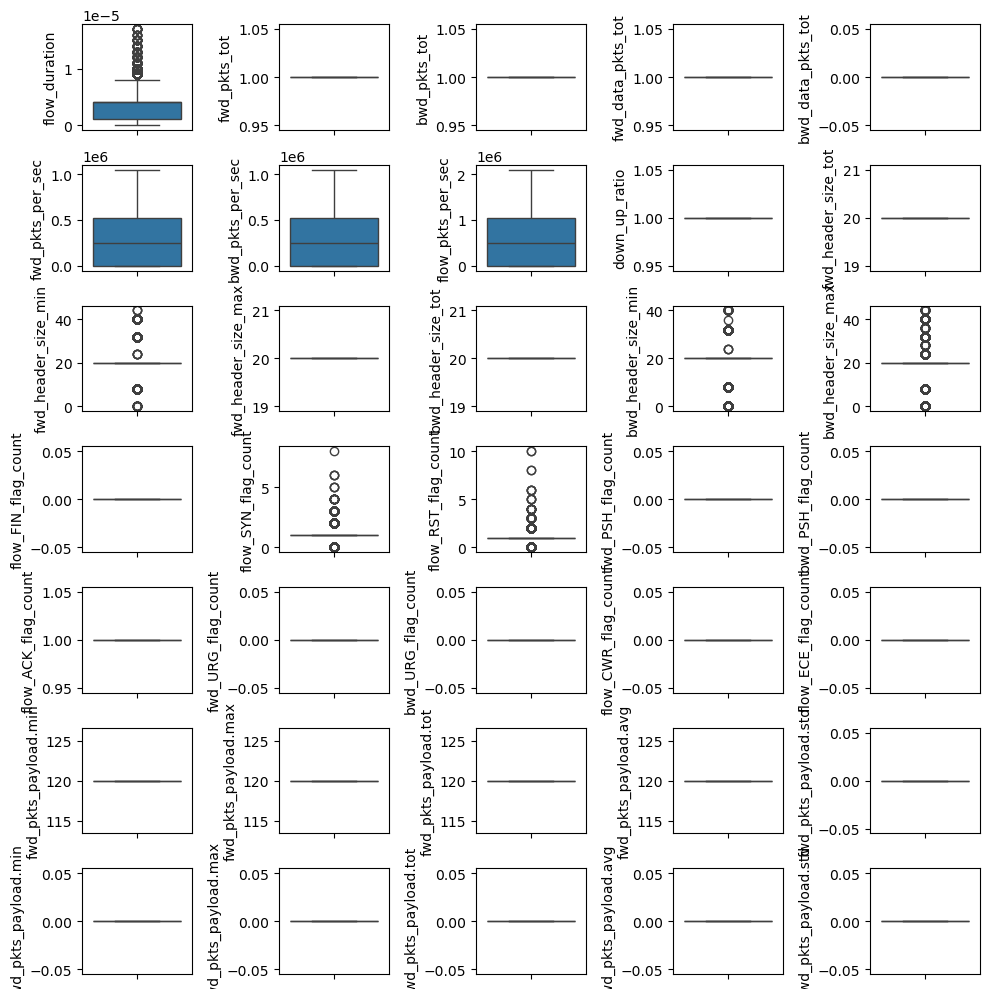

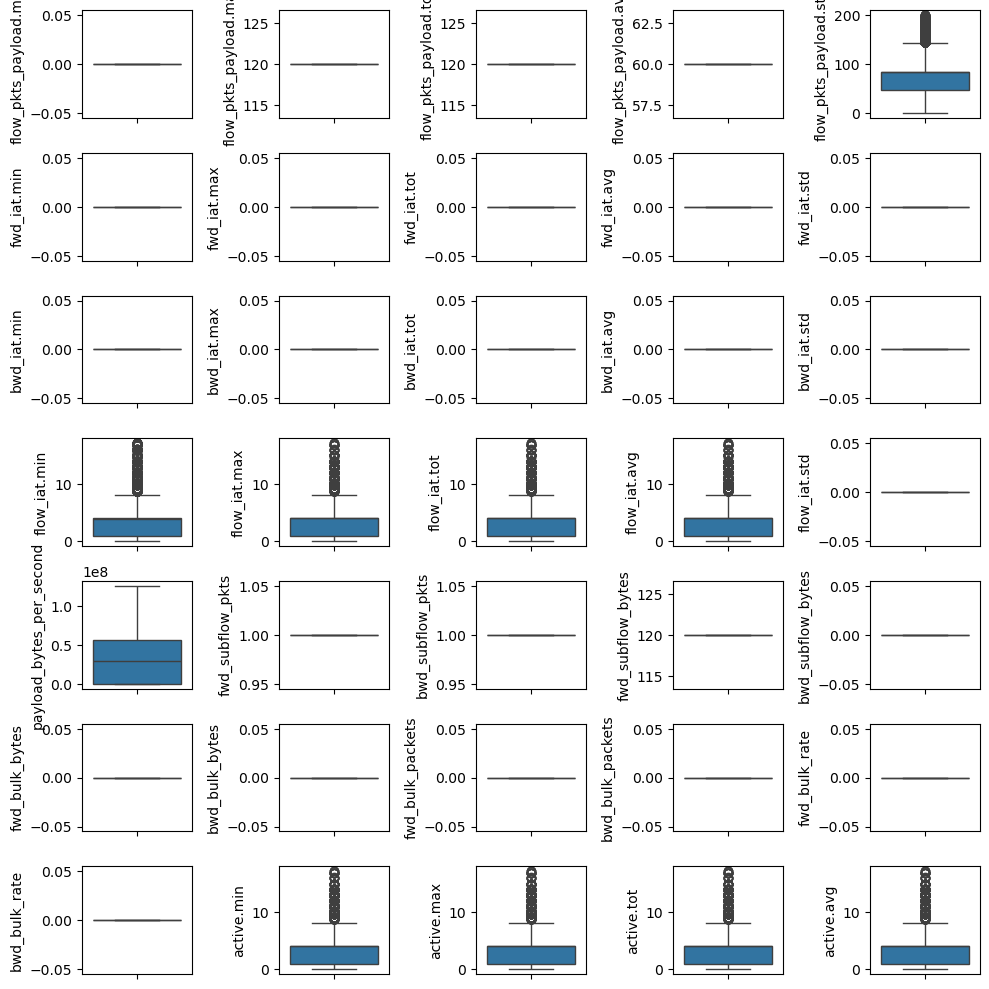

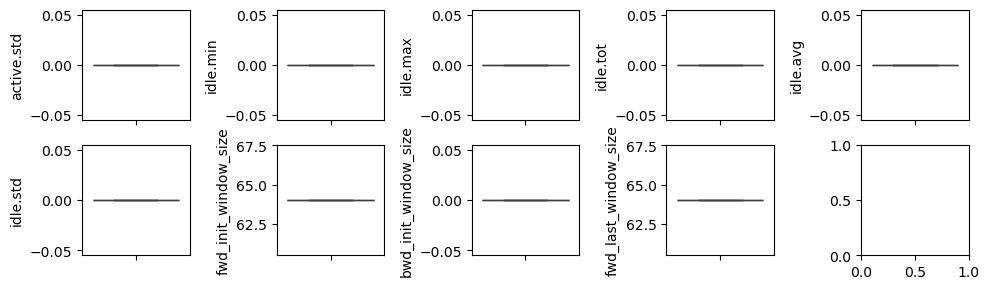

In [20]:
outview(I)

Outliers are greatly reduced but further outlier cleaning is to be tried.

In [21]:
log_x=np.log1p(I)
print("Skewness comparison of original data(0) vs IQR normalisation(1) vs log transformation(2)")
pd.concat([num.skew(),I.skew(),log_x.skew()],ignore_index=True,axis=1)

Skewness comparison of original data(0) vs IQR normalisation(1) vs log transformation(2)


,0,1,2
flow_duration,128.392529,0.18946,0.189453
fwd_pkts_tot,125.378260,0.00000,0.000000
bwd_pkts_tot,244.793596,0.00000,0.000000
fwd_data_pkts_tot,166.694384,0.00000,0.000000
bwd_data_pkts_tot,258.595501,0.00000,0.000000
...,...,...,...
idle.avg,7.249915,0.00000,0.000000
idle.std,54.790418,0.00000,0.000000
fwd_init_window_size,2.745259,0.00000,0.000000
bwd_init_window_size,4.210994,0.00000,0.000000


Very high improvement in skewness is observed.<a name="logiqr"></a>

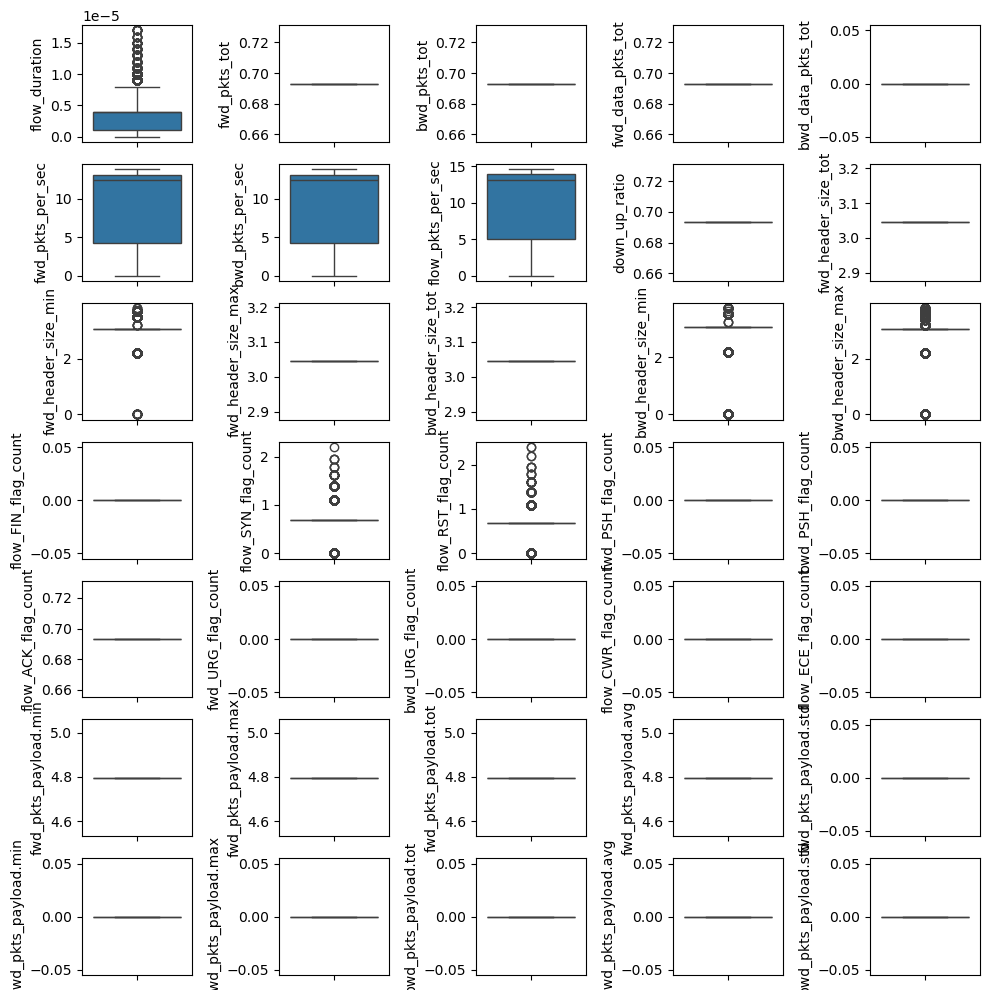

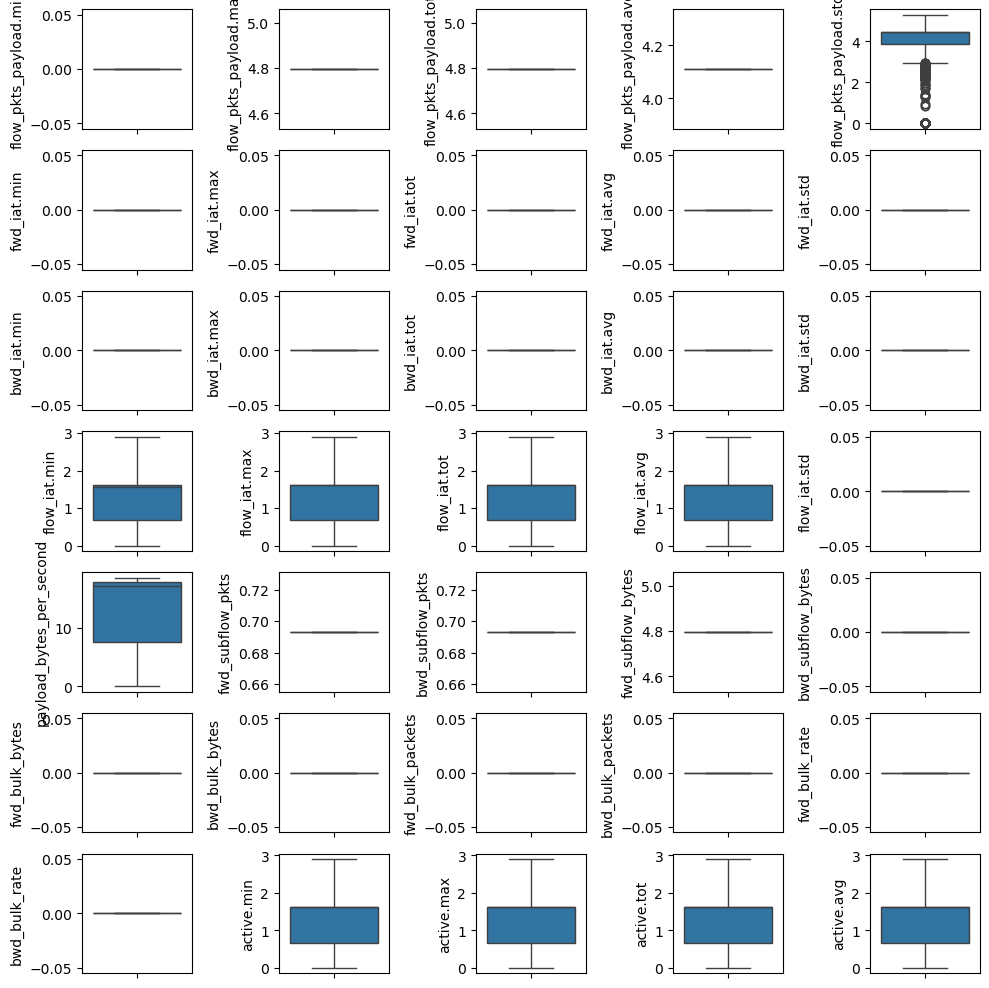

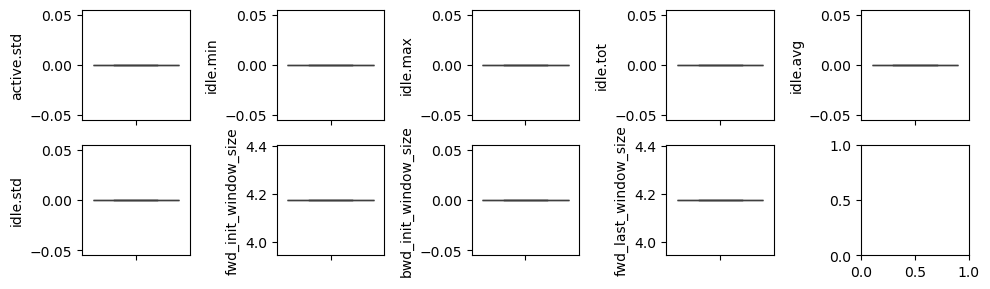

In [22]:
outview(log_x)

Outliers are minimal after log transformation so this transformed data is used for further analysis. Only 7 features are showing presence of outliers. Even further modification to the data is avoided as it is already a highly processed data.

<a name="encoding"></a>**DATA ENCODING**

In [23]:
onehot=OneHotEncoder(sparse_output=False,drop='first')
enc_data=onehot.fit_transform(cat)
A=pd.DataFrame(enc_data,columns=onehot.get_feature_names_out(cat.columns),index=new_data.index)
X=pd.concat([log_x,A],axis=1,ignore_index=False)
y=new_data['Attack_type']
print("The features after encoding is :")
X

The features after encoding is :


,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,...,proto_udp,service_dhcp,service_dns,service_http,service_irc,service_mqtt,service_ntp,service_radius,service_ssh,service_ssl
0,0.000004,0.693147,0.693147,0.693147,0.0,0.247757,0.145133,0.362795,0.693147,3.044522,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000004,0.693147,0.693147,0.693147,0.0,0.248637,0.145676,0.364016,0.693147,3.044522,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.000004,0.693147,0.693147,0.693147,0.0,0.246988,0.144660,0.361730,0.693147,3.044522,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000004,0.693147,0.693147,0.693147,0.0,0.248104,0.145346,0.363276,0.693147,3.044522,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000004,0.693147,0.693147,0.693147,0.0,0.248508,0.145595,0.363837,0.693147,3.044522,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,0.000006,0.693147,0.693147,0.693147,0.0,12.030368,12.030368,12.723512,0.693147,3.044522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123113,0.000007,0.693147,0.693147,0.693147,0.0,11.881949,11.881949,12.575093,0.693147,3.044522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123114,0.000006,0.693147,0.693147,0.693147,0.0,12.030368,12.030368,12.723512,0.693147,3.044522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123115,0.000006,0.693147,0.693147,0.693147,0.0,12.030368,12.030368,12.723512,0.693147,3.044522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The two object features are encoded using one hot encoding and the encoded data is concatenated with the normalised DataFrame to form new feature DataFrame and the target column is seperated.

Features are consisted of 90 columns after encoding(changed from 79 columns). target column is obviously 1 column(Attack_type).

<a name="datsam"></a>**DATA SAMPLING**

In [24]:
print("The target column is: ")
y

The target column is: 


0                MQTT_Publish
1                MQTT_Publish
2                MQTT_Publish
3                MQTT_Publish
4                MQTT_Publish
                 ...         
123112    NMAP_XMAS_TREE_SCAN
123113    NMAP_XMAS_TREE_SCAN
123114    NMAP_XMAS_TREE_SCAN
123115    NMAP_XMAS_TREE_SCAN
123116    NMAP_XMAS_TREE_SCAN
Name: Attack_type, Length: 117922, dtype: object

In [25]:
print("The class wise frequency of target variable is:")
y.value_counts()

The class wise frequency of target variable is:


Attack_type
DOS_SYN_Hping                 90089
Thing_Speak                    7654
ARP_poisioning                 7625
MQTT_Publish                   4142
NMAP_UDP_SCAN                  2584
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  533
Wipro_bulb                      219
Metasploit_Brute_Force_SSH       36
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

The target classes are still biased so sampling is not good. Since the dominant class is very large(90089) and the least occurring class is too small(28), oversampling of the data might lead to great errors.<a name="clas"></a>

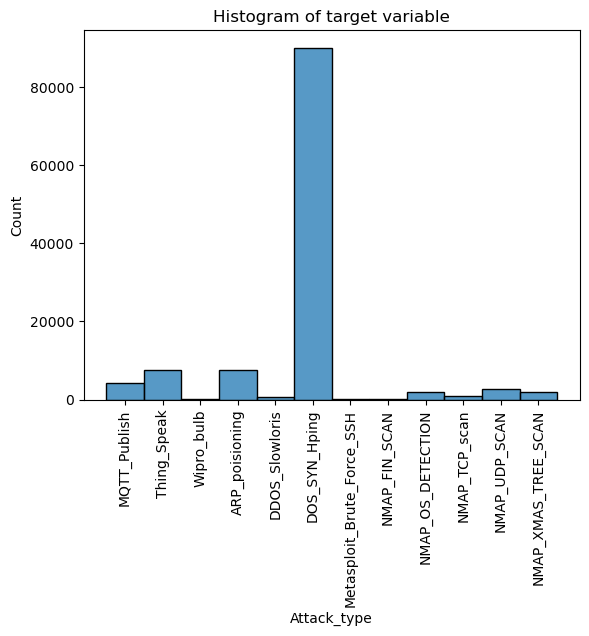

In [26]:
plt.figure()
sns.histplot(y)
plt.xticks(rotation=90)
plt.title("Histogram of target variable")
plt.show()

In [27]:
randsamp=RandomUnderSampler(sampling_strategy={'DOS_SYN_Hping':10000,'NMAP_FIN_SCAN':0,'Metasploit_Brute_Force_SSH':0
                                               ,'Wipro_bulb':0,'DDOS_Slowloris':0,'NMAP_TCP_scan':0},random_state=88)
X_undsamp, y_undsamp = randsamp.fit_resample(X, y)#To reduce the samples in the classes noted in the dictionary to the specified number
smote=SMOTE(random_state=88)
X_finsamp,y_finsamp=smote.fit_resample(X_undsamp, y_undsamp)#To oversample the remaining classes to the most frequent class
print("The frequency of classes in target variable after sampling adjustments: ")
y_finsamp.value_counts()

The frequency of classes in target variable after sampling adjustments: 


Attack_type
ARP_poisioning         10000
DOS_SYN_Hping          10000
MQTT_Publish           10000
NMAP_OS_DETECTION      10000
NMAP_UDP_SCAN          10000
NMAP_XMAS_TREE_SCAN    10000
Thing_Speak            10000
Name: count, dtype: int64

The dominant class is undersampled to a count of 10000 even though this leads to data loss, this undersampling is necessary for  model building. The least occuring classes with frequency of around 1000 or less are removed as they consist of insufficient data and might lead to underfitting.
The remaining classes are oversampled to reach a uniform class frequency.<a name="sampclas"></a>

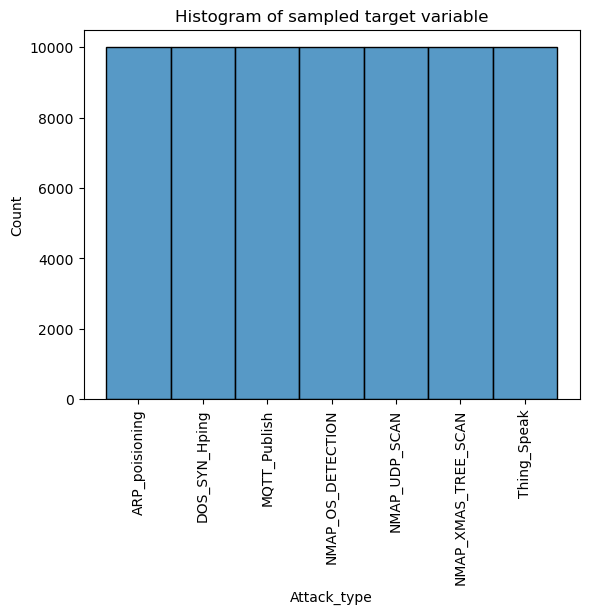

In [28]:
plt.figure()
sns.histplot(y_finsamp)
plt.xticks(rotation=90)
plt.title("Histogram of sampled target variable")
plt.show()

New target column is an unbiased column.

In [29]:
def collinearity_check(num,x):
  colli=num.corr()
  C=[]
  D=[]
  for i in colli.columns:
    for j in colli[i].index:
      if i==j:
        continue
      else:
        if (colli.loc[i,j]>x or colli.loc[i,j]<-x):
          C.append([i,j,colli.loc[i,j]])
  [D.append(i) for i in C if [i[1],i[0],i[2]] not in D]
  return D

print("Fairly linear feature combinations",len(collinearity_check(X_finsamp,0.7)))
print("High linear feature combinations",len(collinearity_check(X_finsamp,0.9)))

Fairly linear feature combinations 69
High linear feature combinations 43


High collinearity observed<a name="colli"></a>

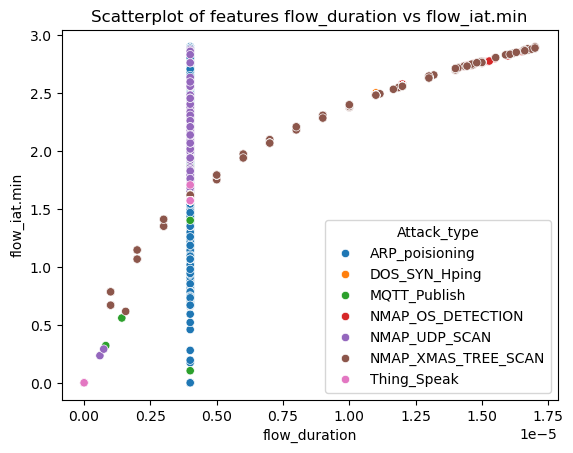

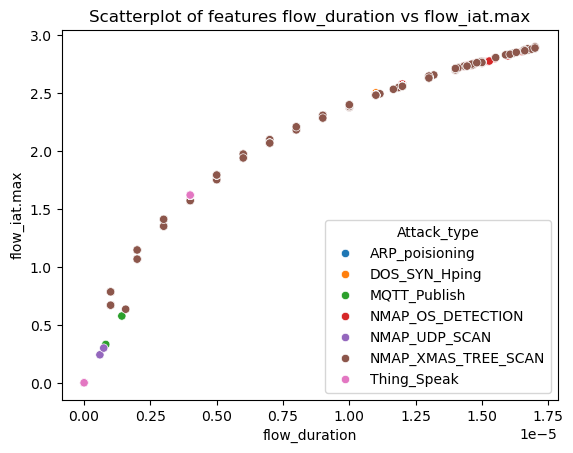

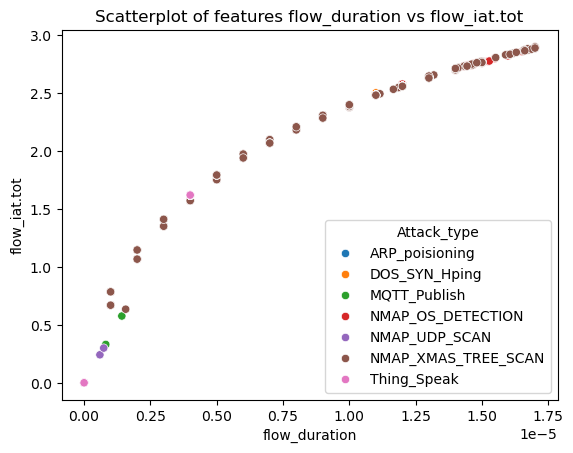

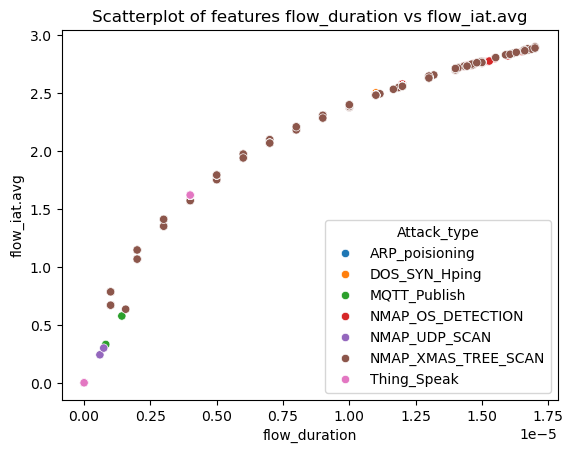

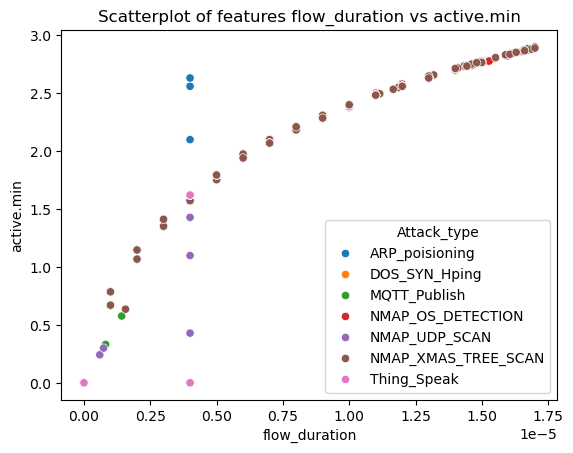

In [30]:
L=collinearity_check(X_finsamp,0.9)
for i in L[0:5]:
  plt.figure()
  plt.title(("Scatterplot of features "+i[0]+" vs "+i[1]))
  sns.scatterplot(x=X_finsamp[i[0]],y=X_finsamp[i[1]],hue=y_finsamp)

Five random highly correlated features are plotted. The graphs show high correlation especially for the target class NMAP_XMAS_TREE_SCAN.<a name="heatcorr"></a>

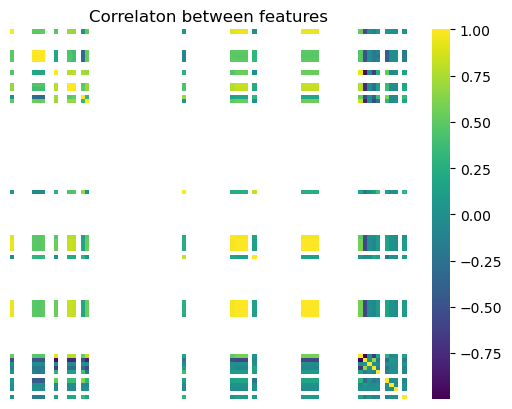

In [31]:
plt.figure()
plt.title("Correlaton between features")
sns.heatmap(X_finsamp.corr(),cmap='viridis',xticklabels=False,yticklabels=False)
plt.show()

Presence of high positive correlation is observed in the heatmap, high negative correlation is also observed in some of the features. Multicollinearity is observed.

<a name="feateng"></a>**FEATURE ENGINEERING**

<a name="pca"></a>

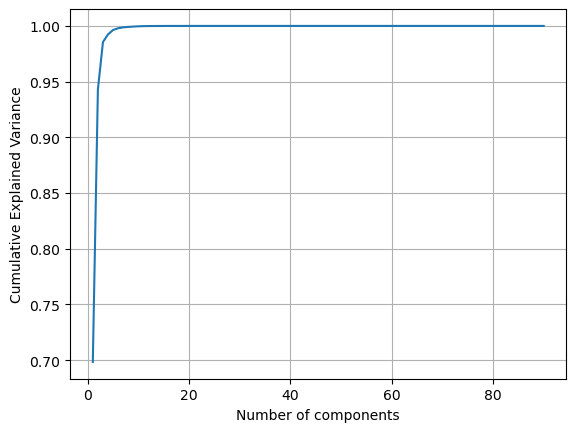

The nearest number corresponding to 99.99% of cumulative explained variance is  12


In [32]:
pca=PCA()
pca.fit(X_finsamp)
explained_variance=pca.explained_variance_ratio_
cumulative_explained_variance=np.cumsum(explained_variance)
plt.plot(range(1,len(explained_variance)+1),cumulative_explained_variance)
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()
ncomp=round(np.interp(.9999,cumulative_explained_variance,range(1,len(explained_variance)+1)))
print("The nearest number corresponding to 99.99% of cumulative explained variance is ",ncomp)

By plotting the cumulative explained variance ratio vs the number of components, we can roughly estimate the number of dimensions to be created. The curve seems to be flattening at around the no of components=10. By using the interpolation technique of numpy, the no of components near to the 0.9999 of cumulative explained variance ratio is found out.

In [33]:
pca=PCA(n_components=ncomp,random_state=88)
X_dimen=pd.DataFrame(pca.fit_transform(X_finsamp))
X_dimen

,0,1,2,3,4,5,6,7,8,9,10,11
0,-12.139834,-1.534101,-3.902532,0.050910,-0.195447,-0.148471,0.309512,-0.009441,0.404516,-0.369733,0.021144,0.113445
1,-10.470370,-0.264351,3.339018,0.007188,-0.248297,0.027139,0.050731,0.376652,-0.256296,0.109092,-0.653266,0.588133
2,-10.470643,-0.264593,3.339074,0.007164,-0.248312,0.027088,0.050716,0.376649,-0.256314,0.109061,-0.653264,0.588133
3,-10.687748,-0.796244,3.105435,-0.093536,-0.307934,0.023262,-0.006240,-0.075501,0.335808,0.576939,-0.057111,-0.261710
4,-10.690130,-0.797602,3.105857,-0.093684,-0.308105,0.022998,-0.006380,-0.075532,0.335691,0.576732,-0.057103,-0.261697
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-3.575352,4.306982,0.392351,1.702284,-0.730446,-0.288387,0.331322,0.074907,0.083505,0.045108,0.135405,0.026972
69996,-5.365126,4.865674,3.209889,-0.660380,0.485982,-1.209753,-0.302164,-0.511669,0.175811,0.289719,-0.013737,0.099410
69997,-4.338486,6.213871,2.759710,-0.494412,0.126085,0.016325,-0.228622,1.095154,0.095300,0.063013,-0.259290,0.243598
69998,-5.385968,4.860989,3.213655,-0.660810,0.486034,-1.212106,-0.302626,-0.511448,0.175022,0.288717,-0.013673,0.099569


As a result of dimentionality reducion by principal component analysis method, and by selecting the threshold of cumulative explained variance ratio to 0.9999, the features are converted to 12 hybrid features(used to be 90 features).<a name="dimcorr"></a>

The correlation between new features


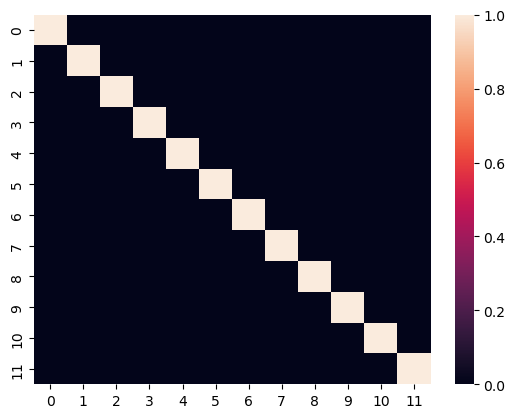

In [34]:
print("The correlation between new features")
sns.heatmap(X_dimen.corr())
plt.show()

Almost zero correlation observed between the new features.

In [35]:
stdscale=StandardScaler()
X_scaled=stdscale.fit_transform(X_dimen)
X_scaled

array([[-1.19711197e+00, -2.55617560e-01, -1.56060624e+00, ...,
        -1.89593611e+00,  1.36890028e-01,  1.16257801e+00],
       [-1.03248573e+00, -4.40470941e-02,  1.33525947e+00, ...,
         5.59408596e-01, -4.22934752e+00,  6.02713947e+00],
       [-1.03251262e+00, -4.40873915e-02,  1.33528179e+00, ...,
         5.59247884e-01, -4.22933457e+00,  6.02714054e+00],
       ...,
       [-4.27819129e-01,  1.03537771e+00,  1.10359675e+00, ...,
         3.23123219e-01, -1.67868250e+00,  2.49637428e+00],
       [-5.31111571e-01,  8.09955726e-01,  1.28512721e+00, ...,
         1.48050221e+00, -8.85224881e-02,  1.02037946e+00],
       [-8.23301922e-02,  8.30888189e-01, -1.26747665e-02, ...,
         4.03022896e-01,  9.21735275e-01, -4.14489091e-03]])

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_finsamp,test_size=.25,random_state=88)
print("X-train is of shape",X_train.shape)
print("y-train is of shape",y_train.shape)
print("X-test is of shape",X_test.shape)
print("y-test is of shape",y_test.shape)

X-train is of shape (52500, 12)
y-train is of shape (52500,)
X-test is of shape (17500, 12)
y-test is of shape (17500,)


<a name="modbuild"></a>**MODEL BUILDING**

In [37]:
#Model fitting without hyperparameters
models=[GaussianNB(),LogisticRegression(max_iter=1000),KNeighborsClassifier(),RandomForestClassifier(),SVC()]
Acc_score=[]
train_acc=[]
f1_sc=[]
prec=[]
reca=[]
for i in models:
  i.fit(X_train,y_train)
  pred=i.predict(X_test)
  Acc_score.append(accuracy_score(y_test,pred))
  train_acc.append(accuracy_score(y_train,i.predict(X_train)))
  prec.append(classification_report(y_test,pred,output_dict=True)['weighted avg']['precision'])
  f1_sc.append(classification_report(y_test,pred,output_dict=True)['weighted avg']['f1-score'])
  reca.append(classification_report(y_test,pred,output_dict=True)['weighted avg']['recall'])
print("Models with no hyperparameter tuning")
no_hyp=pd.DataFrame(data=[train_acc,Acc_score,f1_sc,prec,reca],columns=['Training Accuracy','Testing Accuracy','F1-Score','Precision','Recall'],
             index=['Gaussian NB','Logistic Regression','KNN','Random Forest','SVC'])
no_hyp

Models with no hyperparameter tuning


,Training Accuracy,Testing Accuracy,F1-Score,Precision,Recall
Gaussian NB,0.810133,0.844857,0.870076,0.880533,0.858876
Logistic Regression,0.814914,0.843029,0.867257,0.870514,0.861029
KNN,0.798553,0.842696,0.865467,0.869434,0.849685
Random Forest,0.823029,0.844034,0.867895,0.871335,0.867768
SVC,0.814914,0.843029,0.867257,0.870514,0.861029


In [38]:
start_time = datetime.now()
log_reg = LogisticRegression(max_iter=1000,random_state=88,)
log_reg_params = {'C': [90,95,100,105],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'penalty':['none','l1','l2','elasticnet']}
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5)
log_reg_grid.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
log_reg_grid.best_params_

C:\Users\josep\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\josep\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\josep\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\josep\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\josep\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\josep\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Duration: 1:40:48.852243


{'C': 90, 'penalty': 'l1', 'solver': 'saga'}

In [39]:
start_time = datetime.now()
svm = SVC()
svm1_params = {'C': [90,95,100], 'kernel': ['rbf']}
svm1_grid = GridSearchCV(svm, svm1_params, cv=5)
svm1_grid.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
svm1_grid.best_params_

Duration: 0:11:15.082456


{'C': 100, 'kernel': 'rbf'}

In [40]:
start_time = datetime.now()
rfc = RandomForestClassifier()
rfc_params = {'n_estimators': [70,72,75], 'max_depth': [12],
              'max_features': ['sqrt']}
rfc_grid = GridSearchCV(rfc, rfc_params, cv=5)
rfc_grid.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
rfc_grid.best_params_

Duration: 0:01:12.832960


{'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 70}

In [41]:
start_time = datetime.now()
knn=KNeighborsClassifier()
knn_params={'n_neighbors':[17,18,19],'metric':['manhattan','euclidean','minkowski'],'weights':['distance','uniform']}
knn_grid=GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
knn_grid.best_params_

Duration: 0:01:45.146237


{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [42]:
start_time = datetime.now()
nb=GaussianNB()
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_grid=GridSearchCV(nb,nb_params)
nb_grid.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
nb_grid.best_params_

Duration: 0:01:11.219776


{'var_smoothing': 0.3511191734215131}

In [44]:
log_reg = LogisticRegression(C=90,max_iter=1000,penalty='l1',solver='saga',random_state=88)
svm = SVC(C=100,kernel='rbf',random_state=88)
rfc=RandomForestClassifier(max_depth=12,max_features='sqrt',n_estimators=70,random_state=88)
knn=KNeighborsClassifier(n_neighbors=19,metric='manhattan',weights='distance')
nb=GaussianNB(var_smoothing=0.3511191734215131)

In [45]:
models=[nb,log_reg,knn,rfc,svm]
Acc_score=[]
train_acc=[]
f1_sc=[]
prec=[]
reca=[]
for i in models:
  i.fit(X_train,y_train)
  pred=i.predict(X_test)
  Acc_score.append(accuracy_score(y_test,pred))
  train_acc.append(accuracy_score(y_train,i.predict(X_train)))
  prec.append(classification_report(y_test,pred,output_dict=True)['weighted avg']['precision'])
  f1_sc.append(classification_report(y_test,pred,output_dict=True)['weighted avg']['f1-score'])
  reca.append(classification_report(y_test,pred,output_dict=True)['weighted avg']['recall'])
with_hyp=pd.DataFrame(data=[train_acc,Acc_score,f1_sc,prec,reca],columns=['Training Accuracy','Testing Accuracy','F1-Score','Precision','Recall'],
             index=['Gaussian NB','Logistic Regression','KNN','Random Forest','SVC'])
print("Models after hyperparameter tuning :")
with_hyp

C:\Users\josep\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Models after hyperparameter tuning :


,Training Accuracy,Testing Accuracy,F1-Score,Precision,Recall
Gaussian NB,0.832362,0.847200,0.871600,0.876743,0.866114
Logistic Regression,0.834000,0.845543,0.866057,0.868743,0.866343
KNN,0.821306,0.845385,0.863984,0.867736,0.855401
Random Forest,0.843518,0.846607,0.866692,0.869554,0.872977
SVC,0.834000,0.845543,0.866057,0.868743,0.866343


On comparing the models, it is observed that Random Forest Classifier has the highest testing accuracy and has a precision second only to logistic regression but it outshines every other model with its higher recall. There is higher risk of false positive in this model but the higher testing accuracy and fairly similar training accuracy indicates the model as a good model<a name="mod"></a>

Comparison of models with and without hyperparameter


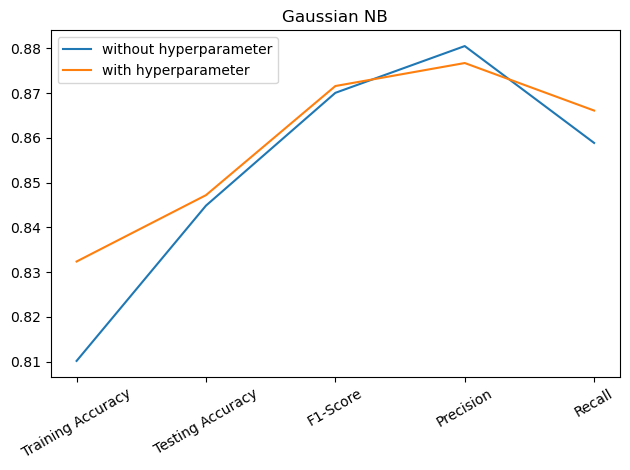

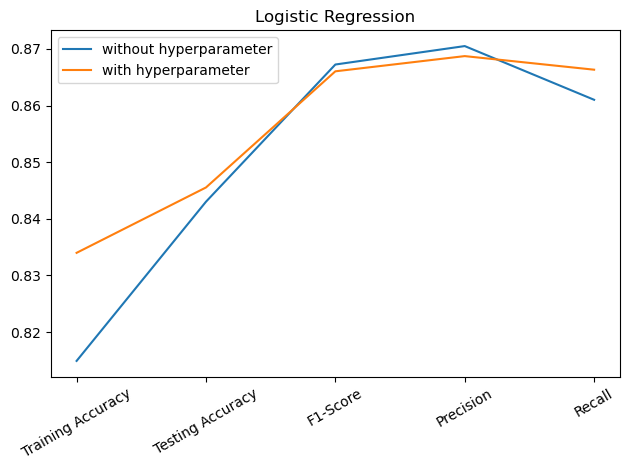

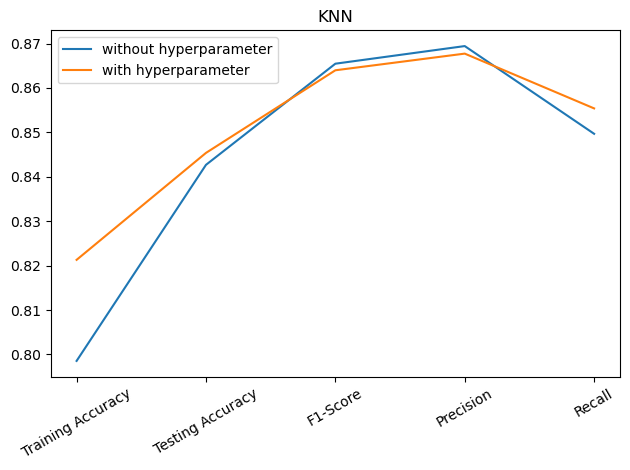

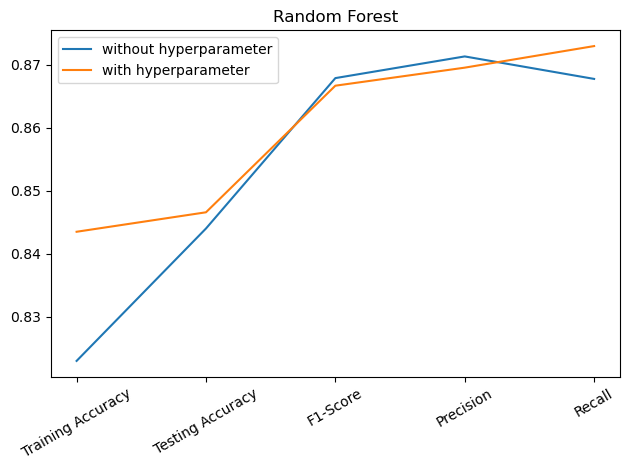

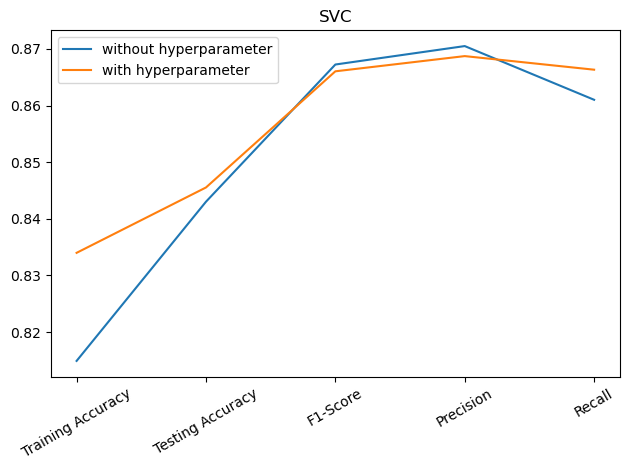

In [46]:
print("Comparison of models with and without hyperparameter")
for i in range(5):
    plt.figure()
    plt.title(no_hyp.index[i])
    plt.plot(no_hyp.loc[no_hyp.index[i],:])
    plt.plot(with_hyp.loc[with_hyp.index[i],:])
    plt.xticks(rotation=30)
    plt.legend(['without hyperparameter','with hyperparameter'])
    plt.tight_layout()

In all the models, the precision seem to be reduced after hyperparameter tuning. Most precise model was logistic regression without any tuning. All the remaining parameters of all models are improved by hyperparameter tuning.
The F1 score, precision, recall refers to the weighted mean of testing phase.

The hypertuned Random Forest Classifier seem to be the best performing model among all the models due to its good fitting high recall and second best precision.

<a name="pipe"></a>**PIPELINING THE MODEL**

Accuracy Score is:  0.8697142857142857
The classification report is: 
                     precision    recall  f1-score   support

     ARP_poisioning       0.96      0.99      0.98      2489
      DOS_SYN_Hping       1.00      1.00      1.00      2476
       MQTT_Publish       1.00      1.00      1.00      2551
  NMAP_OS_DETECTION       0.55      0.63      0.59      2453
      NMAP_UDP_SCAN       0.99      0.99      0.99      2516
NMAP_XMAS_TREE_SCAN       0.58      0.50      0.54      2498
        Thing_Speak       0.99      0.96      0.98      2517

           accuracy                           0.87     17500
          macro avg       0.87      0.87      0.87     17500
       weighted avg       0.87      0.87      0.87     17500

The confusion matrix is: 


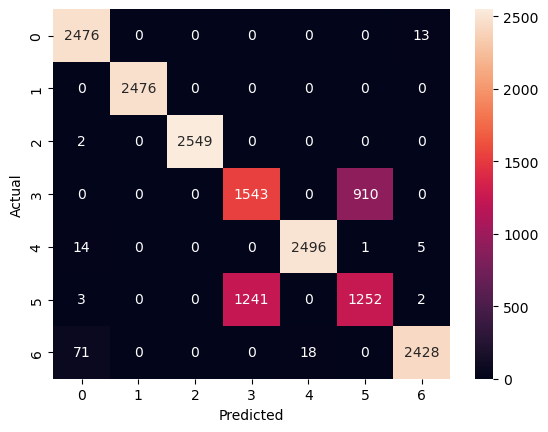

In [47]:
X_pipe=pd.concat([np.expm1(X_finsamp[log_x.columns.tolist()]),pd.DataFrame(onehot.inverse_transform(X_finsamp[A.columns.tolist()]),columns=['proto','service'])],axis=1)
#the sample adjusted dataset is decoded to create the categorical feautures and logarithmic transformation is reversed too to return the numerical values to orginal form
y_pipe=y_finsamp.copy()

num_feat=num.columns.tolist()
cat_feat=['proto','service']

norm_skew=FunctionTransformer(iqrnorm)#Enabling the usage of IQR normalisation function in pipeline.
loga=FunctionTransformer(np.log1p)#Enabling the usage of log transformation function in pipeline.

num_cols=Pipeline(steps=[('norm',norm_skew),('fin_norm',loga)])#numerical columns are supposed to go through normalisaton and log transformation before analysis.
cat_cols=Pipeline(steps=[('enc_data',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'))])#categorical columns need only encoding.
preprocess=ColumnTransformer(transformers=[('numer',num_cols,num_feat),('categ',cat_cols,cat_feat)],remainder='drop')
pipeline=Pipeline(steps=[('preprocessor',preprocess),('pca',PCA(n_components=12)),('scaler',StandardScaler()),('class',RandomForestClassifier(max_depth=12,max_features='sqrt',n_estimators=70,random_state=88))])
#The encoded and normalised columns are then pipelined to undergo scaling using standard scaler, dimentionality reduction using principal component analysis and classification modelling using Random Forest Classifier.

X_pipetrain,X_pipetest,y_pipetrain,y_pipetest=train_test_split(X_pipe,y_pipe,test_size=0.25,random_state=88)
pipeline.fit(X_pipetrain,y_pipetrain)
y_pipepred=pipeline.predict(X_pipetest)
print("Accuracy Score is: ",accuracy_score(y_pipetest,y_pipepred))
print("The classification report is: ")
print(classification_report(y_pipetest,y_pipepred))
print("The confusion matrix is: ")
sns.heatmap(confusion_matrix(y_pipetest,y_pipepred),annot=True,fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<a name="hm"></a><a name="save"></a>**SAVING THE MODEL**

In [48]:
with open('attack_identifier_pkl','wb') as files:#new file with the name attack_identifier_pkl is created with writing mode.
  pickle.dump(pipeline,files)#the model is saved to the recently created file as a pickle file.